In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
from keras.models import Sequential,load_model
from keras.layers import Dense,Reshape,advanced_activations
from keras.constraints import nonneg
import numpy as np
%matplotlib inline
import tensorflow
import keras
import math
import time
import datetime
from sklearn import cluster, datasets, metrics, linear_model,pipeline
import warnings
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.


In [2]:
dfnh = pd.read_csv('nh.csv')
dfnhc =dfnh.copy()

alweneed =(dfnhc['當量'].mean()+(dfnhc['當量'].std())*4)
dfnhc['當量'].where(dfnhc['當量']<=alweneed,alweneed, inplace=True)
dfnhc['平均車間距'].where(dfnhc['平均車間距']>=0.0,0.0, inplace=True)
# dfnhc['當量'].plot()

In [3]:
# K-means 前準備

dfnhcg=dfnhc.groupby(['VD編號','方向']);
dfnhcgg=dfnhcg.head(168).groupby(['VD編號','方向']);
dfnhcggm=pd.DataFrame(dfnhcgg['當量'].mean().copy());
# dfnhcggm.plot()
dfnhcggms=dfnhcggm.sort_values('當量').reset_index().copy();
# dfnhcggms.plot()
eqlist =dfnhcggms['當量'].astype('int32').values.tolist()

indexlist =dfnhcggms.index.tolist()
# indexlist
Temp = []
for ele in range(len(indexlist)):
    Temp.append([indexlist[ele],eqlist[ele]])
X = np.array(Temp);
np.random.seed(5)
kmeans = cluster.KMeans(n_clusters = 2).fit(X)
# K-means 分群結果,共八群
dfnhcggms['label']=kmeans.labels_;
#看K-means有幾群
set(dfnhcggms.label)


{0, 1}

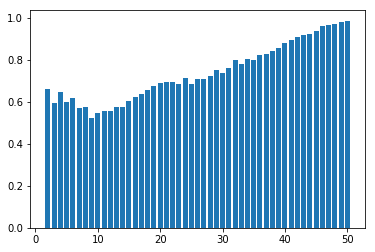

[0.65845927354975287, 0.59506039132567001, 0.64440503605026622, 0.59927378415986488, 0.61883240735261247, 0.569469905399976, 0.57520523631563847, 0.52146148722012675, 0.54550112652978133, 0.55520577851222486, 0.55372970463971016, 0.57638756352708742, 0.57283902889547123, 0.6046372670792749, 0.62226314663190097, 0.63843015660850511, 0.65735953136124869, 0.67569608763799005, 0.68792704614954814, 0.69187929754174327, 0.69218417835951307, 0.68582525623314761, 0.71098046120003577, 0.68260180417021876, 0.70584559071195818, 0.7076131418357976, 0.72119076630950518, 0.75124539520235467, 0.73845897460471677, 0.76103293654401005, 0.79668875787262283, 0.77715676508957077, 0.80130431990531259, 0.79602912064067355, 0.82339568926018658, 0.82487160573981699, 0.84153481230133509, 0.85568244257679349, 0.87917753071966909, 0.893003218920841, 0.90930357404552242, 0.9160289898857451, 0.92309974808419415, 0.93545631627421666, 0.95781410210235896, 0.96566410989714513, 0.97081995867644144, 0.97666286644164924

In [4]:
# K means 分群績效

silhouette_avgs = []
ks = range(2,51)

for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 50 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [5]:
vdlistd= dfnhcggms.set_index(['VD編號','方向']).index.tolist()

dfvdd=pd.DataFrame(vdlistd,columns=['a','b']);dfvdd['c']=dfvdd.index;dfvdd
dfvdd['d'] = dfnhcggms['label']
dfvdd1=dfvdd.set_index(['a','b']);

In [6]:
dfnhcri=dfnhc.set_index(['VD編號','方向']);
dfnhcri['sortby'] = None
dfnhcri['label']= None
dfvdd1
Y1 = dfnhcri['label']
x1 = dfnhcri['sortby']
Y2 = dfvdd1['d']
x2 = dfvdd1['c']
Y1.update(Y2)
x1.update(x2)
dfnhcri['sortby']=x1.values
dfnhcri['label']=Y1.values
dfnhcris=dfnhcri.sort_values(['sortby','日期']);
dfnhcris

道路                 位置  道路數          日期        時間          當量  \
VD編號    方向                                                                     
VQKWL60 東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  00:00:00     5.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  01:00:00    12.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  02:00:00     1.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  03:00:00     2.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  04:00:00     1.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  06:00:00     4.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  07:00:00    12.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  08:00:00    48.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  09:00:00    60.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  10:00:00    75.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  11:00:00    43.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  12:00:00   107.28813   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  13:00:00    28.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  14:00:00    35.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  15:00:00    68.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  16:00:00    50.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  17:00:00    60.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  18:00:00    57.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  19:00:00    26.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  20:00:00    19.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  21:00:00    13.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  22:00:00    12.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  23:00:00     8.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  00:00:00     1.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  01:00:00     1.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  02:00:00     7.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  03:00:00     2.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  05:00:00     2.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  06:00:00     3.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  07:00:00     5.00000   
...            ...                ...  ...         ...       ...         ...   
V6120C0 東     麥帥二橋               市民麥二    2  2017-01-11  18:00:00  1834.50000   
        東     麥帥二橋               市民麥二    2  2017-01-11  19:00:00  2352.01730   
        東     麥帥二橋               市民麥二    2  2017-01-11  20:00:00  2152.67770   
        東     麥帥二橋               市民麥二    2  2017-01-11  21:00:00  1932.53440   
        東     麥帥二橋               市民麥二    2  2017-01-11  22:00:00  2087.00000   
        東     麥帥二橋               市民麥二    2  2017-01-11  23:00:00  1774.66100   
        東     麥帥二橋               市民麥二    2  2017-01-12  00:00:00   963.55930   
        東     麥帥二橋               市民麥二    2  2017-01-12  01:00:00   625.50000   
        東     麥帥二橋               市民麥二    2  2017-01-12  02:00:00   480.00000   
        東     麥帥二橋               市民麥二    2  2017-01-12  03:00:00   346.00000   
        東     麥帥二橋               市民麥二    2  2017-01-12  04:00:00   279.00000   
        東     麥帥二橋               市民麥二    2  2017-01-12  05:00:00   346.00000   
        東     麥帥二橋               市民麥二    2  2017-01-12  06:00:00   405.50000   
        東     麥帥二橋               市民麥二    2  2017-01-12  07:00:00   868.50000   
        東     麥帥二橋               市民麥二    2  2017-01-12  08:00:00  1956.50000   
        東     麥帥二橋               市民麥二    2  2017-01-12  09:00:00  2109.18650   
        東     麥帥二橋               市民麥二    2  2017-01-12  10:00:00  2304.00000   
        東     麥帥

In [7]:
#把群跟群分開
labelist=dfnhcris.label.unique().tolist(); labelist
dictfftf={}
labelist.sort()
for eje in labelist:
    dictfftf['cluster{}'.format(eje)]=dfnhcris.where(dfnhcris.label == eje).dropna()
    

In [8]:
dictfftf.keys()

['cluster0', 'cluster1']

In [9]:
pergg=dictfftf[dictfftf.keys()[0]].reset_index().copy()

In [18]:
# pergg[pergg.sortby==tempi][3400:3500]

[0, 15, 22, 9, 5]
22
2
1


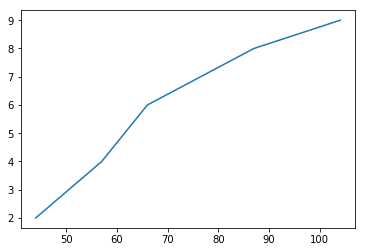

In [19]:
# 測試求斜率

# tx = [44,57,66,87,104] 
# ty = [2,4,6,8,9]

# plt.plot(tx,ty)


# fgh= []
# te,tt=0,0
# for e,t in zip(tx,ty):
#     if te == 0:
#         te=e
#         tt=t
#         fgh.append(0)
#         pass
#     else:
#         fgh.append((t-tt)*100/(e-te))
#         te=e
#         tt=t
        
# print fgh
# if max(fgh) >0:
#     print max(fgh)
#     print fgh.index(max(fgh))
# else:
#     print min(fgh)
#     print fgh.index(min(fgh))
    
# fghdiff = []
# kjkj = 0
# for rtrt in fgh:
#     if kjkj == 0:
#         kjkj=rtrt
#         pass
#     else:
#         fghdiff.append(abs(rtrt-kjkj))
#         kjkj=rtrt
# print  fghdiff.index(max(fghdiff)) 

In [102]:

def equationz(xxx,yyy):
    warnings.simplefilter('ignore', np.RankWarning)
    xtra = np.array(xxx)
    ytra = np.array(yyy)
    
  

    # calculate polynomial
    ztra = np.polyfit(xtra, ytra, 3)
    rtra = np.polyfit(xtra, ytra, 1)
    frtra = np.poly1d(rtra)
    ftra = np.poly1d(ztra)

    # calculate new x's and y's
    x_new = np.linspace(xtra.min(), xtra.max(), 250)
    ry_new = frtra(x_new)
    y_new = ftra(x_new)
    slope, intercept, r_value, p_value, std_err = st.linregress(xtra,ytra)
    
    print slope
#     plt.plot(x_new, y_new, '3g--')

    plt.plot(xtra,ytra,'yo', x_new, y_new,'-k', x_new, ry_new,'3')
    
    if ytra.mean()> 20:
        plt.axhline(y=ytra.mean(), xmin=0, xmax=len(xtra), color='m')
    else :
        plt.axhline(y=ytra.mean(), xmin=0, xmax=len(xtra), color='m')
    
    plt.xlim([xtra.min()+1, xtra.max() ])
    plt.show()




In [148]:
tempi = 29

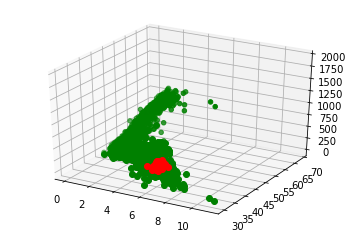

In [149]:
perggcon = pergg[pergg.sortby==tempi]
perggconhu=perggcon.where((perggcon['時間']=='18:00:00')&(perggcon['星期'] == 'Fri')).copy()

redobsp = perggconhu['平均速度'].copy().values
redobac = perggconhu['平均佔有率'].copy().values
redobeq = perggconhu['當量'].copy().values

tempnoweq = pergg[pergg.sortby==tempi]['當量']
tempnowsp = pergg[pergg.sortby==tempi]['平均速度']
tempnowac = pergg[pergg.sortby==tempi]['平均佔有率']
# tempsplow = tempnowsp.where(tempnowsp>tempnowsp.mean()-tempnowsp.std()*3,tempnowsp.mean()-tempnowsp.std()*3).copy()
# fgfg=tempnoweq.where(tempnoweq<tempnoweq.mean()+tempnoweq.std()*3,tempnoweq.mean()+tempnoweq.std()*3).copy().values
# gfgf=tempsplow.where(tempsplow<tempsplow.mean()+tempsplow.std()*3,tempsplow.mean()+tempsplow.std()*3).copy().values
# trtr=tempnowac.where(tempnowac<tempnowac.mean()+tempnowac.std()*3,tempnowac.mean()+tempnowac.std()*3).copy().values

fgfg=tempnoweq.copy().values
gfgf=tempnowsp.copy().values
trtr=tempnowac.copy().values




"""plt.axhline(y=tempnowsp.mean(), xmin=0, xmax=tempnowsp.count(), color='r')
plt.axhline(y=tempnowsp.mean()-tempnowsp.std(), xmin=0, xmax=tempnowsp.count(), color='c')
plt.axhline(y=tempnowsp.mean()-tempnowsp.std()*2, xmin=0, xmax=tempnowsp.count(), color='c')
plt.axhline(y=tempnowsp.mean()-tempnowsp.std()*3, xmin=0, xmax=tempnowsp.count(), color='c')
plt.axhline(y=tempnowsp.mean()+tempnowsp.std(), xmin=0, xmax=tempnowsp.count(), color='c')
plt.axhline(y=tempnowsp.mean()+tempnowsp.std()*2, xmin=0, xmax=tempnowsp.count(), color='c')
plt.axhline(y=tempnowsp.mean()+tempnowsp.std()*3, xmin=0, xmax=tempnowsp.count(), color='c')

# plt.axhline(y=tempnowac.mean()+tempnowac.std(), xmin=0, xmax=tempnowac.count(), color='m')
plt.axvline(tempnowac.mean(), color='r')
plt.axvline(tempnowac.mean()-tempnowac.std(), color='m')
plt.axvline(tempnowac.mean()+tempnowac.std(), color='m')
plt.axvline(tempnowac.mean()+tempnowac.std()*2, color='m')
plt.axvline(tempnowac.mean()+tempnowac.std()*3, color='m')
"""

#3D視圖失敗，紅色不明顯
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(redobac,redobsp,redobeq,c='r',marker='^')
ax.scatter(trtr,gfgf,fgfg,c='g',marker = 'o')


plt.plot(trtr,gfgf,'go')  #red = accu
plt.plot(redobac,redobsp,'ro')
# plt.plot(fgfg,trtr,'ro')  #red = accu , x = 當量
# plt.plot(fgfg,gfgf,'bo')  #blue = speed , x = 當量


# plt.plot(trtr,fgfg,'ro')  #red = accu , y = 當量
# plt.plot(gfgf,fgfg,'bo')  #blue = speed , y = 當量

-0.00742201253209


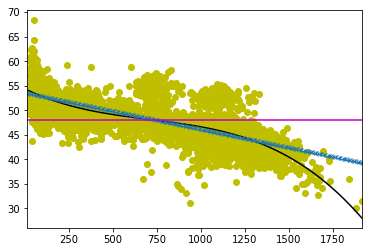

In [150]:
equationz(fgfg,gfgf)

0.00358911408113


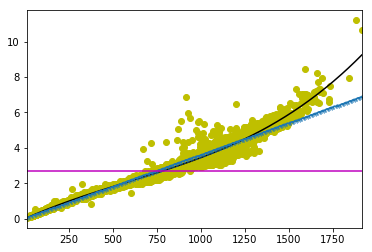

In [151]:
equationz(fgfg,trtr)

6.64343725392
43.822291225
5.74736549133
8.25749636596


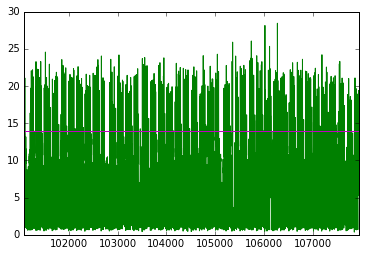

In [526]:
# pergg[pergg.sortby==tempi]['當量'].plot(color = 'r')
gtrvb=pergg[pergg.sortby==tempi]['平均佔有率']
gtrvb.plot(color= 'g')
# pergg[pergg.sortby==tempi]['平均速度'].plot(color='b')
# pergg[pergg.sortby==tempi]['平均車間距'].plot(color = 'y')
# plt.axhline(y=pergg[pergg.sortby==tempi]['平均速度'].mean(), xmin=0, xmax=pergg[pergg.sortby==tempi]['平均速度'].count(), color='c')
# plt.axhline(y=gtrvb.mean()+gtrvb.std(), xmin=0, xmax=pergg[pergg.sortby==tempi]['平均佔有率'].count(), color='m')

print pergg[pergg.sortby==tempi]['平均速度'].std()
print pergg[pergg.sortby==tempi]['平均速度'].mean()
print pergg[pergg.sortby==tempi]['平均佔有率'].std()
print pergg[pergg.sortby==tempi]['平均佔有率'].mean()

In [144]:
'當量'

'平均佔有率'

avgper=pergg[pergg.sortby==tempi].copy()
acmean=avgper['平均佔有率'].mean()
spmean=avgper['平均速度'].mean()
spstd=avgper['平均速度'].std()
eqmean=avgper['當量'].mean()


avgper.where((avgper['平均佔有率']<acmean)&(avgper['平均速度']<spmean-spstd*3)).dropna()

# print avgper.count()
# print spmean
# print spstd
# float(avgper.where(avgper<star3).count())/avgper.count()*100
# 

,VD編號,方向,道路,位置,道路數,日期,時間,當量,平均速度,平均佔有率,平均車間距,星期,sortby,label
7561,VQKWL61,東,民權東路六段,民權東路六段203巷口往西30M,2.0,2016-04-30,02:00:00,340.00000,11.998823,1.50,166.000,Sat,26,0
7564,VQKWL61,東,民權東路六段,民權東路六段203巷口往西30M,2.0,2016-04-30,05:00:00,82.75862,13.177249,0.46,246.465,Sat,26,0


99.31920160915983

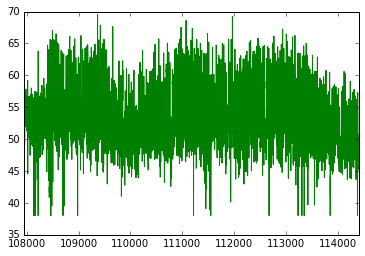

In [405]:
avgper=pergg[pergg.sortby==tempi]['平均速度'].copy()
star3=avgper.mean()-avgper.std()*3
avgper.where(avgper>star3,star3).plot(color= 'g')
float(avgper.where(avgper>star3).count())/avgper.count()*100